In [43]:
import seaborn as sns;
import pandas as pd;
import numpy as np;
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # PCA = Principal Component Analysis
from sklearn.model_selection import cross_val_score;
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

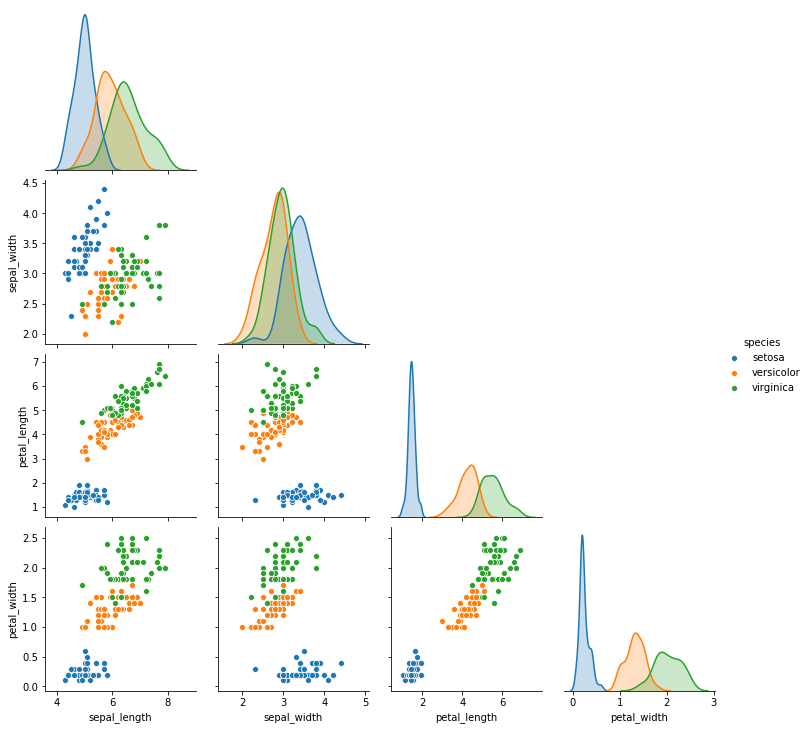

In [3]:
sns.pairplot(iris, hue='species', corner='True') # hue = variable cible

In [49]:
Y = iris['species'].astype('category').cat.codes # On veut afficher le type de fleur
X = iris.drop('species', axis='columns') # On garde que les dimension de la fleur

In [62]:
splits = train_test_split(X, Y,           # features, target
                         train_size=0.3,  # 30% de X_train et Y_train et 70% de Y_test et Y_test
                         stratify=Y,      # Va prendre une proportion aux hasard de valeurs différentes histoire de ne pas avoir des cas où l'on a que des même valeur
                         random_state=2)  # Sert à fixer le harsard pour ne pas avoir des résultat différents à chaque tests.


In [63]:
for each in splits:
    print(each.shape)

(45, 4)
(105, 4)
(45,)
(105,)


In [64]:
X_train, X_test, Y_train, Y_test = splits #On associe chaque shape à une variable

In [65]:
pca = PCA(n_components=2)

In [66]:
pca.fit(X_train)

PCA(n_components=2)

In [67]:
X_tr_PCA = pca.transform(X_train)
X_te_PCA = pca.transform(X_test)

In [68]:
knn = KNN(n_neighbors=3)
knn.fit(X_tr_PCA, Y_train) # On fournis la variable cible

KNeighborsClassifier(n_neighbors=3)

In [69]:
X_tr_PCA.shape, Y_train.shape

((45, 2), (45,))

In [70]:
predictions = knn.predict(X_tr_PCA)

In [71]:
# Créer une mesure de performance
def accuracy(preds, target):
    M = target.shape[0] # Nombre d'exemple
    total_correctes = (preds == target).sum()
    accuracy = total_correctes / M
    return accuracy

In [72]:
accuracy(predictions, Y_train)

0.9555555555555556

In [73]:
cross_val_score(knn,X_tr_PCA,Y_train,cv=15,scoring='accuracy') #cv c'est le nombre de model soit le nb de fold/plie

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       0.66666667, 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])